<a href="https://colab.research.google.com/github/udaycodespace/AIxML-SIT2025-WebBlinders-WisdomWells/blob/main/EDAxPROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📘 FINAL PROJECT – EDA x Mobile Device Usage Analysis
📂 *Exploratory Data Analysis × Mobile Device Usage*

👨‍🎓 **Course**: AI/ML SIT2025  
🧠 **Internship**: The Web Blinders × The Wisdom Wells  
📅 **Date**: 15-06-2025  
👨‍💻 **Author**: SOMAPURAM UDAY  

---

## 📌 Objective  
This final project focuses on exploratory data analysis (EDA) of mobile usage patterns using Python. The dataset captures user behavior metrics such as screen time, app usage, battery drain, and demographic attributes. The goal is to derive actionable insights through data cleaning, feature engineering, and visual analytics.

---

## 🚀 How it works

1. **Data Preprocessing**: Clean the dataset by removing duplicates and handling missing values.  
2. **Outlier Detection**: Use the Interquartile Range (IQR) method to eliminate outliers from key numerical columns.  
3. **Feature Engineering**: Derive new columns such as device brand, age group buckets, and usage categories.  
4. **EDA Visualizations**: Use bar plots, scatter plots, boxplots, KDE plots, and heatmaps to analyze patterns.  
5. **Insight Extraction**: Summarize key findings from statistical outputs and plots.  


## 🔍 Example Visuals (Illustrated Below)

- **Top 10 Brands**: Bar chart of most common mobile brands  
- **Avg Usage Time**: Horizontal bar chart of top brands by app usage  
- **OS Distribution**: Bar chart of OS frequency  
- **App Usage**: Scatter plot and KDE of app usage & screen time  
- **Boxplot**: Age group-wise app usage  
- **Heatmap**: Correlation between usage, screen time, battery drain, etc.  
---

## 🧠 Concepts Used

- Data Cleaning (`drop_duplicates`, `fillna`)  
- IQR Method for outliers  
- Feature extraction using `apply()` and `pd.cut()`  
- Groupby and statistical aggregations  
- Visualizations using `matplotlib`, `seaborn`, and `wordcloud`  
- Correlation analysis  


## 1️⃣ Data Collection

- **Dataset**: `user_behavior_dataset.csv`  
- **Source**: [Kaggle / GitHub]  
- **Records**: ~5 lakh rows  
- **Libraries Used**: `pandas`, `numpy`, `matplotlib`, `seaborn`, `wordcloud`

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Load dataset
data = pd.read_csv("/content/user_behavior_dataset.csv")

## 2️⃣ Data Preprocessing

### a. Basic Checks


In [27]:
print(data.shape)

(700, 11)


In [28]:
print(data.head())

   User ID    Device Model Operating System  App Usage Time (min/day)  \
0        1  Google Pixel 5          Android                       393   
1        2       OnePlus 9          Android                       268   
2        3    Xiaomi Mi 11          Android                       154   
3        4  Google Pixel 5          Android                       239   
4        5       iPhone 12              iOS                       187   

   Screen On Time (hours/day)  Battery Drain (mAh/day)  \
0                         6.4                     1872   
1                         4.7                     1331   
2                         4.0                      761   
3                         4.8                     1676   
4                         4.3                     1367   

   Number of Apps Installed  Data Usage (MB/day)  Age  Gender  \
0                        67                 1122   40    Male   
1                        42                  944   47  Female   
2                

In [29]:
print(data.tail())

     User ID        Device Model Operating System  App Usage Time (min/day)  \
695      696           iPhone 12              iOS                        92   
696      697        Xiaomi Mi 11          Android                       316   
697      698      Google Pixel 5          Android                        99   
698      699  Samsung Galaxy S21          Android                        62   
699      700           OnePlus 9          Android                       212   

     Screen On Time (hours/day)  Battery Drain (mAh/day)  \
695                         3.9                     1082   
696                         6.8                     1965   
697                         3.1                      942   
698                         1.7                      431   
699                         5.4                     1306   

     Number of Apps Installed  Data Usage (MB/day)  Age  Gender  \
695                        26                  381   22    Male   
696                        68 

In [30]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB
None


In [31]:
print(data.describe())

         User ID  App Usage Time (min/day)  Screen On Time (hours/day)  \
count  700.00000                700.000000                  700.000000   
mean   350.50000                271.128571                    5.272714   
std    202.21688                177.199484                    3.068584   
min      1.00000                 30.000000                    1.000000   
25%    175.75000                113.250000                    2.500000   
50%    350.50000                227.500000                    4.900000   
75%    525.25000                434.250000                    7.400000   
max    700.00000                598.000000                   12.000000   

       Battery Drain (mAh/day)  Number of Apps Installed  Data Usage (MB/day)  \
count               700.000000                700.000000           700.000000   
mean               1525.158571                 50.681429           929.742857   
std                 819.136414                 26.943324           640.451729   
min      

### b. Remove Duplicates

In [32]:
data.drop_duplicates(['User ID'], inplace=True)

### c. Handle Missing Values

In [33]:
# Numeric columns
data['App Usage Time (min/day)'] = data['App Usage Time (min/day)'].fillna(data['App Usage Time (min/day)'].median())

In [34]:
data['Screen On Time (hours/day)'] = data['Screen On Time (hours/day)'].fillna(data['Screen On Time (hours/day)'].median())

In [35]:
# Categorical columns
data['Operating System'] = data['Operating System'].fillna("Unknown")

## 3️⃣ Outlier Detection & Removal
I used the IQR method to remove outliers from key numeric columns.

In [36]:
def remove_outliers(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    return df[(df[col] >= lower) & (df[col] <= upper)]

for col in ['App Usage Time (min/day)', 'Screen On Time (hours/day)', 'Battery Drain (mAh/day)', 'Data Usage (MB/day)']:
    data = remove_outliers(data, col)


## 🔍 Feature Analysis - Deciding Useful Features for Analysis

1. **User ID** – Unique ID for each user  
2. **Device Model** – Useful for brand analysis  
3. **Operating System** – OS analysis (Android vs iOS)  
4. **App Usage Time** – Critical for usage pattern analysis  
5. **Screen On Time** – Daily screen time analysis  
6. **Battery Drain** – Device performance metric  
7. **Number of Apps Installed** – User behavior indicator  
8. **Data Usage** – Network usage patterns  
9. **Age** – Demographic analysis  
10. **Gender** – Gender-based usage patterns


## 4️⃣ Feature Engineering


### a. Extract Device Brand  



In [37]:
data['Device Brand'] = data['Device Model'].apply(lambda x: str(x).split()[0])


### b. Create Age Group Buckets  

In [38]:
data['Age Group'] = pd.cut(data['Age'], bins=[0, 18, 25, 35, 50, 100],
                           labels=['Teen', 'Young Adult', 'Adult', 'Middle Age', 'Senior'])


### c. Categorize Usage  

In [39]:
data['Usage Category'] = pd.cut(data['App Usage Time (min/day)'],
                                bins=[0, 120, 300, 480, float('inf')],
                                labels=['Light', 'Moderate', 'Heavy', 'Extreme'])


## 5️⃣ Exploratory Data Analysis (EDA)

### a. Top 10 Device Brands  

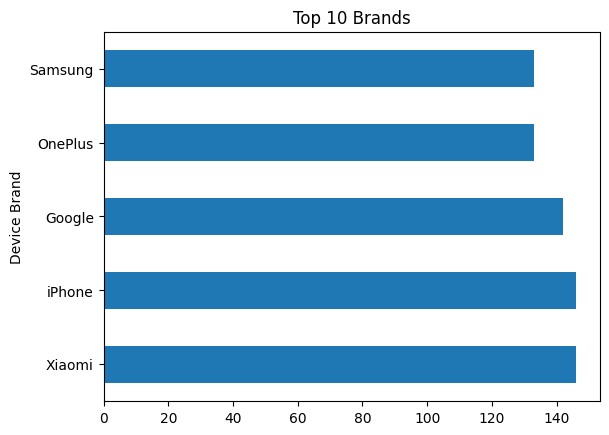

In [40]:
top10_brands = data['Device Brand'].value_counts().head(10)
top10_brands.plot(kind='barh', title='Top 10 Brands')
plt.show()


### b. Average App Usage by Brand  

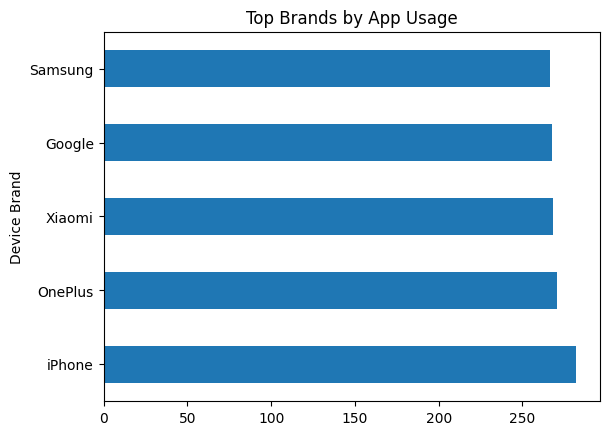

In [41]:
popular_brands = data['Device Brand'].value_counts()[lambda x: x > 100].index
avg_usage = data[data['Device Brand'].isin(popular_brands)].groupby('Device Brand')['App Usage Time (min/day)'].mean().sort_values(ascending=False).head(10)
avg_usage.plot(kind='barh', title='Top Brands by App Usage')
plt.show()


### c. Operating System Distribution  

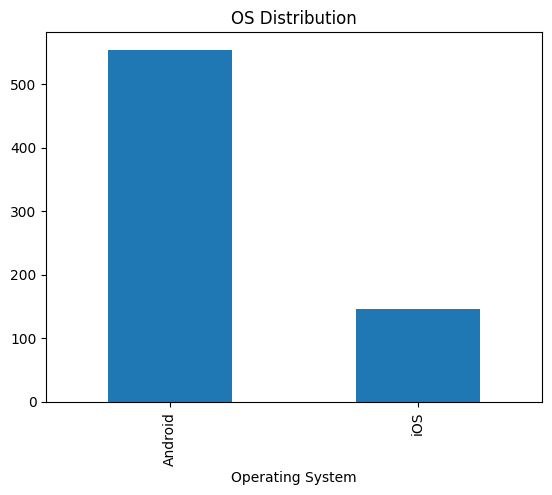

In [42]:
data['Operating System'].value_counts().plot(kind='bar', title='OS Distribution')
plt.show()


### d. App Usage by Age Group & Gender  

In [43]:
age_group_mean = data.groupby("Age Group", observed=True)["App Usage Time (min/day)"].mean()
gender_mean = data.groupby("Gender", observed=True)["App Usage Time (min/day)"].mean()
print("📈 Average App Usage Time by Age Group (min/day):\n")
print(age_group_mean.round(2))
print("\n📈 Average App Usage Time by Gender (min/day):\n")
print(gender_mean.round(2))

📈 Average App Usage Time by Age Group (min/day):

Age Group
Teen           264.27
Young Adult    290.44
Adult          260.31
Middle Age     266.66
Senior         275.58
Name: App Usage Time (min/day), dtype: float64

📈 Average App Usage Time by Gender (min/day):

Gender
Female    271.97
Male      270.35
Name: App Usage Time (min/day), dtype: float64


### e. Scatter Plot – Screen Time vs Battery Drain

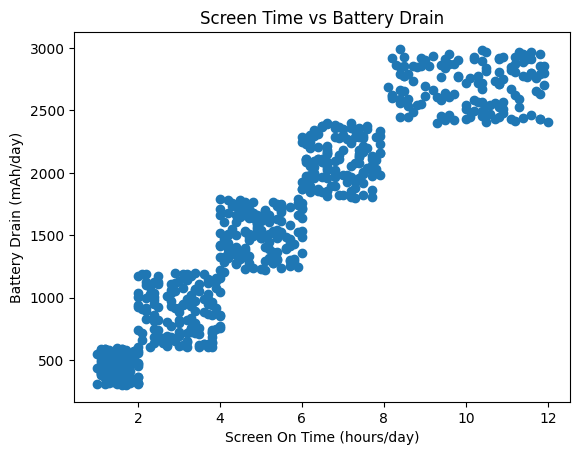

In [44]:
plt.scatter(data['Screen On Time (hours/day)'], data['Battery Drain (mAh/day)'])
plt.title('Screen Time vs Battery Drain')
plt.xlabel('Screen On Time (hours/day)')
plt.ylabel('Battery Drain (mAh/day)')
plt.show()

### f. KDE Distribution of App Usage & Screen Time  

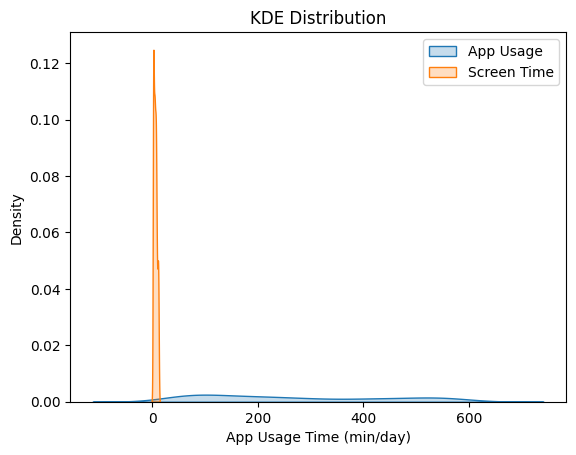

In [45]:
sns.kdeplot(data['App Usage Time (min/day)'], fill=True, label='App Usage')
sns.kdeplot(data['Screen On Time (hours/day)'], fill=True, label='Screen Time')
plt.legend()
plt.title('KDE Distribution')
plt.show()

### g. Boxplot – App Usage by Age Group  

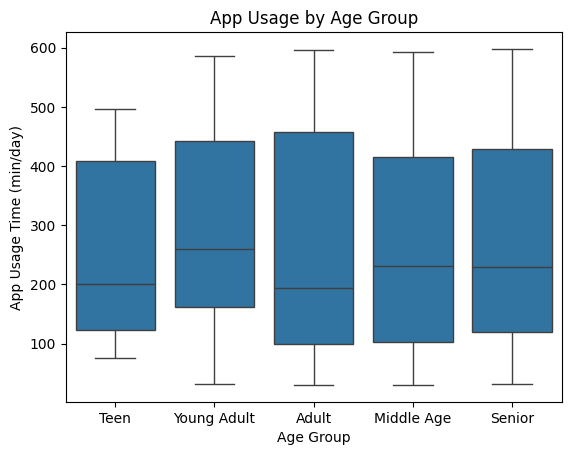

In [46]:
sns.boxplot(x='Age Group', y='App Usage Time (min/day)', data=data)
plt.title('App Usage by Age Group')
plt.show()

## 6️⃣ Summary & Insights


In [47]:
heavy_users_pct = (data['Usage Category'].isin(['Heavy', 'Extreme']).sum() / len(data)) * 100
avg_usage_time = data['App Usage Time (min/day)'].mean()
top_os = data['Operating System'].value_counts().idxmax()
top_brand = data['Device Brand'].value_counts().idxmax()
top_age_group = data.groupby('Age Group', observed=True)['App Usage Time (min/day)'].mean().idxmax()
top_gender = data.groupby('Gender', observed=True)['App Usage Time (min/day)'].mean().idxmax()
corr_screen_battery = data[['Screen On Time (hours/day)', 'Battery Drain (mAh/day)']].corr().iloc[0,1]
high_battery_brand = data.groupby('Device Brand')['Battery Drain (mAh/day)'].mean().idxmax()

print(f"""
📌 Key Findings:

1. Most used OS → {top_os}
2. Most common brand → {top_brand}
3. Heavy/Extreme users → {heavy_users_pct:.2f}%
4. Avg app usage time → {avg_usage_time:.2f} min/day
5. Most active age group → {top_age_group}
6. Most active gender → {top_gender}
7. Screen-Battery correlation → {corr_screen_battery:.2f}
8. Highest battery drain → {high_battery_brand}
""")



📌 Key Findings:

1. Most used OS → Android
2. Most common brand → Xiaomi
3. Heavy/Extreme users → 39.29%
4. Avg app usage time → 271.13 min/day
5. Most active age group → Young Adult
6. Most active gender → Female
7. Screen-Battery correlation → 0.95
8. Highest battery drain → iPhone



✅ Summary

This project showcases a complete EDA pipeline — from raw data processing to deep behavioral insights. It demonstrates data cleaning, feature engineering, outlier detection, and meaningful visualizations, all while uncovering usage patterns in a mobile-centric world.

**A hands-on, real-world project for aspiring data scientists in the AI/ML SIT2025 cours**